In [2]:
%load_ext autoreload
%autoreload 2

from src.dbscan import *
from src.utils import *
from src.metrics import *
from src.clusterization_performance import *
from src.datasets import jain_dataset, example_from_lecture
from src.dbscanrn_optimalized import ti_dbscanrn
from src.dbscanrn import dbscanrn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer

np.random.seed(0)

# DBSCAN vs DBSCANRN 

# Datasets

### Dataset from lecture

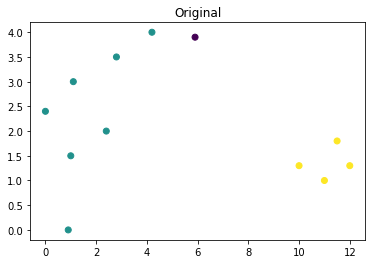

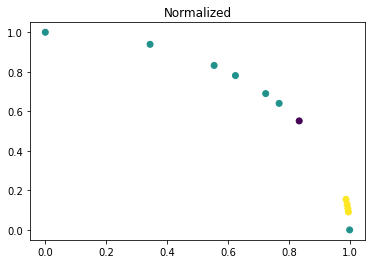

In [4]:
X, y = example_from_lecture()
X_norm = Normalizer().fit_transform(X)

display_points(X, y, 'Original')
display_points(X_norm, y, 'Normalized')

# DBSCAN (euclidean distance)

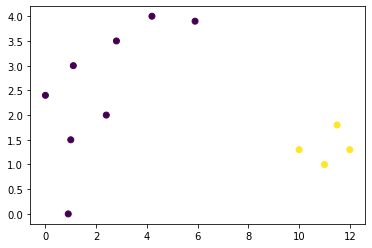

In [8]:
y_pred = dbscan(X=X, epsilon=2, minPts=3, similarity=euclidean_distance)
display_points(X, y_pred)
#evaluate(y_pred, y, X)

# DBSCANRN

### cosine dissimilarity, not optimized KNN

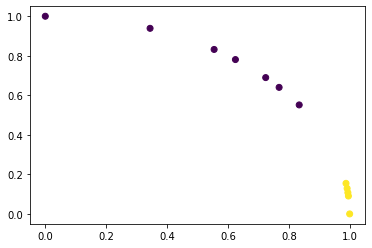

In [9]:
y_pred = dbscanrn(X=X_norm, k=4, similarity=cosine_dissimilarity)
display_points(X_norm, y_pred)

### cosine similarity, not optimized KNN

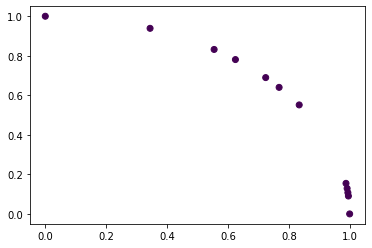

In [10]:
y_pred = dbscanrn(X=X_norm, k=4, similarity=cosine_similarity)
display_points(X_norm, y_pred)

### cosine dissimilarity, ti-KNN

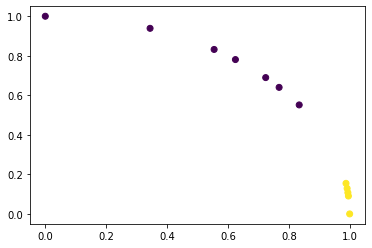

In [11]:
y_pred = ti_dbscanrn(X=X_norm, k=2, similarity=cosine_dissimilarity)
display_points(X_norm, y_pred)

### cosine similarity, ti-KNN

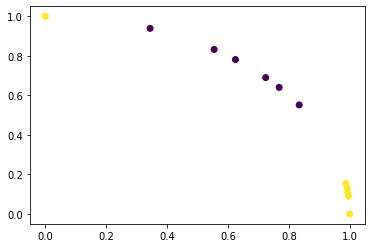

In [12]:
y_pred = ti_dbscanrn(X=X_norm, k=4, similarity=cosine_similarity)
display_points(X_norm, y_pred)

In [65]:
out = pd.DataFrame({
    'point id': np.arange(X.shape[0]),
    'x': X[:, 0],
    'y': X[:, 1],
    # '# of distance/similarity calculations': [],
    # 'point type': [], # 1 - core, 0 - border, -1 - noise
    # 'CId': [] # clusters: cluster identifier or -1 in the case of noise points
})

out

,point id,x,y
0,0,4.2,4.0
1,1,5.9,3.9
2,2,2.8,3.5
3,3,12.0,1.3
4,4,10.0,1.3
5,5,1.1,3.0
6,6,0.0,2.4
7,7,2.4,2.0
8,8,11.5,1.8
9,9,11.0,1.0


In [ ]:
save_file(
    df=out, 
    file_type='OUT', 
    algorithm_name='dbscan', 
    dataset_name='example_from_lecture', 
    n_dimentions=X.shape[1], 
    n_rows=X.shape[0], 
    minPts='', 
    epsilon=''
)

In [ ]:
# stat = pd.DataFrame({
#     'point id': [],
#     'x': [],
#     'y': [],
#     '# of distance/similarity calculations': [],
#     'point type': [],
#     'CId': []
# })
# out